## Ejercicio de kaggle con el dataset de Titanic

- Objetivo: Hacer un algoritmo de clasificación para predecir los pasajeros que sobrevivieron teniendo en cuenta las características

In [19]:
# Importamos las librerías necesarias 

import pandas as pd 
import numpy as np 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns 
import matplotlib.pyplot as plt 
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

In [12]:
# Conectamos a la API de kaggle y descargamos los datos 
api = KaggleApi()
api.authenticate()
api.competition_download_files('Titanic')


In [2]:
# Leemos los CSV para ver 
test = pd.read_csv(r'C:\Users\Gabriel Castillo\Desktop\Cosas Gabriel\Prácticas Kaggle\test.csv')
train = pd.read_csv(r'C:\Users\Gabriel Castillo\Desktop\Cosas Gabriel\Prácticas Kaggle\train.csv')

In [21]:
# Vemos como se ve el data set
train.head()
# test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### EDA del Dataset

In [4]:
# Observamos primero la informacion del train 

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


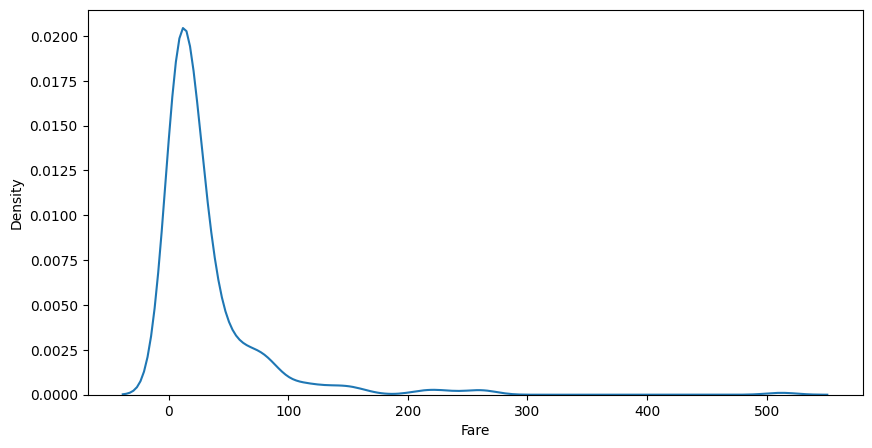

In [7]:
# Plot para ver el fare 
plt.figure(figsize=(10,5))
sns.kdeplot(train.Fare);

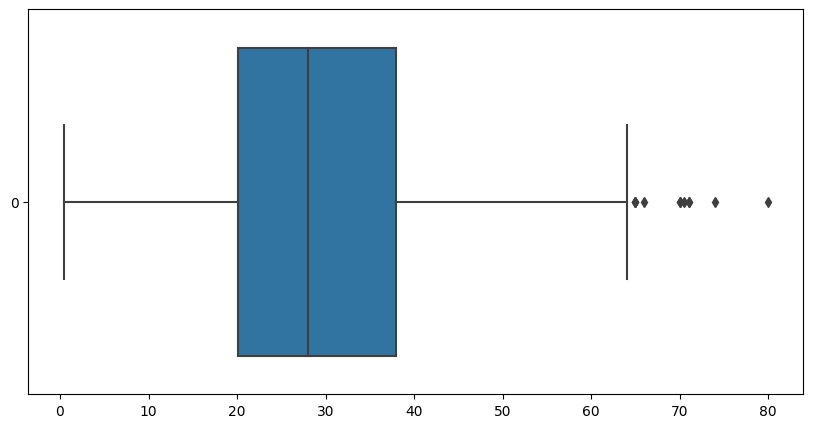

In [8]:
# Distribución de edades
plt.figure(figsize=(10,5))

sns.boxplot(train.Age, orient='h');

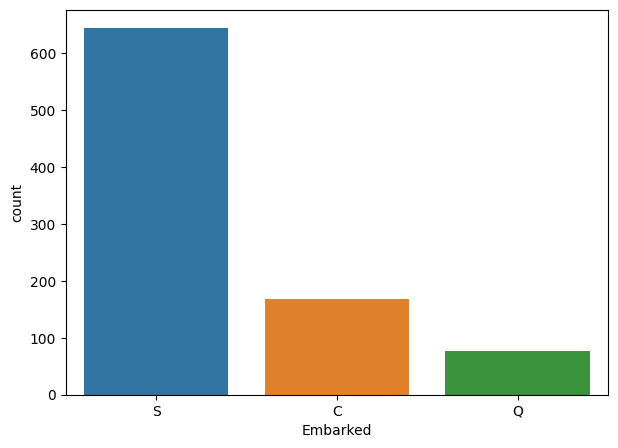

In [9]:
# Veremos donde embarcaron 
plt.figure(figsize=(7,5))
sns.countplot(x = train.Embarked);

<Figure size 3000x1000 with 0 Axes>

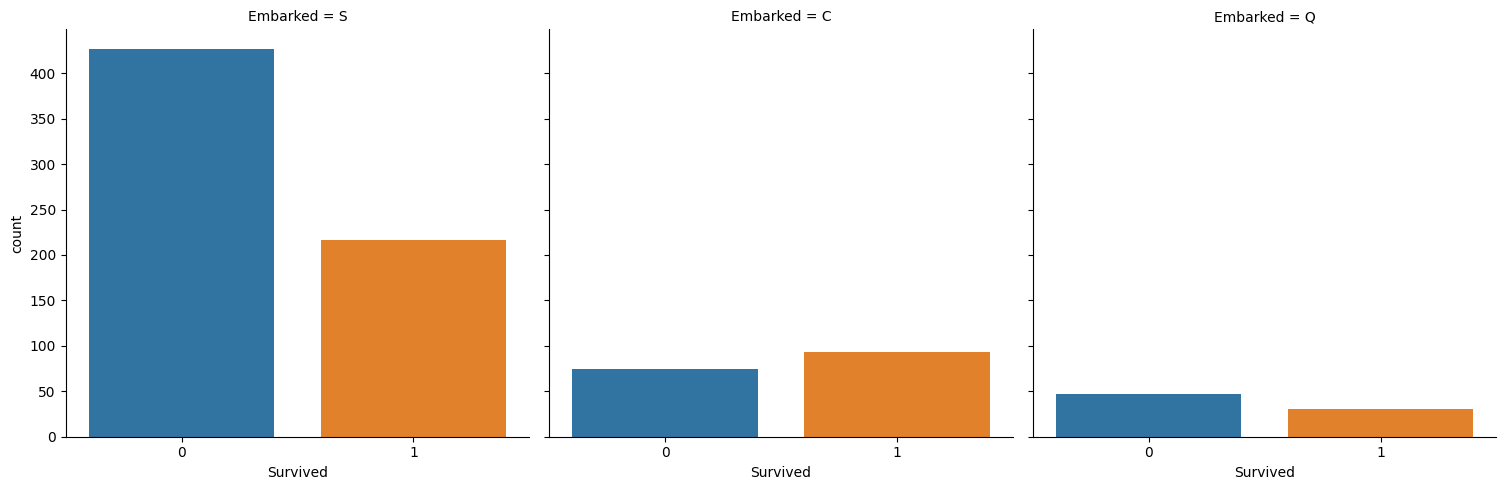

In [12]:
# Hacemos un heatmap para ver las correlaciones del dataset
plt.figure(figsize=(30,10));
sns.catplot(x = 'Survived', col= 'Embarked', col_wrap= 4, data = train, kind= 'count');

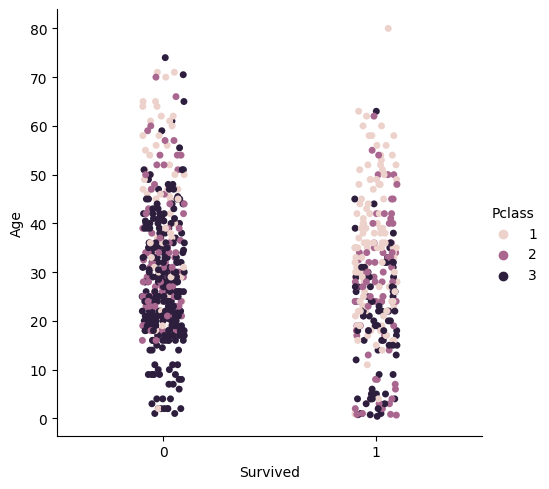

In [14]:
# Dispersión de los datos teniendo en cuenta si sobrevivieron o no 
sns.catplot(x = 'Survived', y = 'Age', hue= 'Pclass', data= train  );


#### Train/Test/Predicción

- Una vez hecho el EDA procederemos a hacer el modelo 

In [36]:
# Dividimos en X e Y. Uno donde estan los features y otro donde están los resultados 

X = train.drop(columns=['Survived', 'Name', 'Sex', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
y = train.Survived


In [38]:
X = X.fillna(0)

In [39]:
# Creamos el objeto con el modelo 
# Se usa una regresión logística porque tenemos que dar un resultado entre vive y no vive

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [41]:
test = test.drop(columns = ['Name', 'Sex', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

In [43]:
test = test.fillna(0)

In [44]:
predictions = model.predict(test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [53]:
first_try = pd.DataFrame({'PassangerID': test.PassengerId, 
                          'Survived': predictions})
first_try

,PassangerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
